<img src="../../dsix.png" style="height:128px;">

# Natural Language Processing: Zipf's Law

You've had a lot of practice learning about how to clean and visualize data with useful Python tools like Pandas and Matplotlib. Now, let's see how these can be used in natural language processing, the study of how we can use computing to analyze and understand human language.

One major challenge in natural language processing (or NLP, for short), is looking at how *frequently* certain words are used, which helps us create machine learning algorithms to better understand language.

The American linguist George Kingsley Zipf devised a mathematical relationship between the frequency of a word (the number of times it occurs), and its rank (1st, 2nd, 3rd most common) in a text. We will first investigate the amount of times a word occurs in a text, and then use our skills to clean and visualize parts of datasets that are used by leading NLP researchers.

## Warm-up

First, let's look at how we determine rank and frequency, using the text of the famous writer Rabindranath Tagore's short story _The Postman_. First, just run the cells below.

In [2]:
import numpy as np
import operator
words = np.array([])
with open("postmaster.txt") as f:
    for line in f.read().split(' '):
        words = np.append(words, line)
cleaned_words = np.array([])
for w in words:
    if w not in ['', '?', '!', '.', '<', '>', ':', '"', '-']:
        cleaned_words = np.append(cleaned_words, w.replace('\n', ' ').lower())

`cleaned_words` is an array, and each element in `cleaned_words` is a word in the story. How many words long is Tagore's text?

In [3]:
len(cleaned_words)

2173

Fill out the code below such that the dictionary `counts` tells us how times each word appears in the text. Each key should be a word and each value should be the amount of times the word occurs in the text.

In [4]:
counts = {}
for w in cleaned_words:
    if w not in counts:
        counts[w] = 1
    else:
        counts[w] += 1


How many times does the word "postmaster" appear in the text?

In [5]:
counts['postmaster']

22

What does the array `sorted_freq` show us? Based on the values of `sorted_freq`, what values would have rank 1? Rank 2? Discuss with your partner.

In [6]:
sorted_freq = np.flip(np.asarray(sorted(counts.items(), key=operator.itemgetter(1))), 0)

Here, look at the first 20 values of `sorted_freq`. Hint: use list slicing.

In [7]:
sorted_freq[:20]

array([['the', '162'],
       ['of', '68'],
       ['and', '57'],
       ['to', '48'],
       ['a', '48'],
       ['in', '43'],
       ['his', '40'],
       ['was', '29'],
       ['he', '28'],
       ['had', '28'],
       ['her', '26'],
       ['she', '25'],
       ['would', '22'],
       ['postmaster', '22'],
       ['for', '21'],
       ['on', '21'],
       ['with', '19'],
       ['at', '18'],
       ['ratan', '15'],
       ['that', '15']], dtype='<U17')

**Interact: ** Discuss what you think is the mathematical relationship between frequency and rank with your group.

## The Corpus of Contemporary American English

Although we can get somewhat of an idea about word frequencies by looking at short stories and books, much of natural language processing works with analyzing large collections of text coming from multiple sources like books, magazines, and even films! A _corpus_ is one such collection of textual data.

We will observe how Zipf's Law works using the Corpus of Contemporary American English (COCA), found at https://corpus.byu.edu/coca/old/, which contains over 560 million words from texts ranging from television programs to science magazines, and is used extensively by NLP researchers.

First, load the file `coca_sample.csv` as a Pandas dataframe, and assign it to the variable `coca`. Remember to import the library Pandas as well!

In [8]:
#Import Pandas here
import pandas as pd

In [9]:
#Read the CSV here
coca = pd.read_csv('coca_sample.csv')

In the table, we can see words(the column `lemma`), their rank, their frequency(the column `TOT FREQ`), and the frequency of a word in a particular type of media, such as newspapers, magazines, and fiction books. Look at the table here for a minute or so and think about the relationship between the rank and frequency of a word.

In [18]:
coca.head()

,rank,lemma,PoS,DISPERSION,TOT FREQ,TV,FICTION,MAGAZINE,NEWSPAPER,ACADEMIC
0,NaN,NaN,NaN,NaN,4.023770e+02,81.69,78.752,83.275,79.368,79.292
1,1.0,the,a,0.98,2.203891e+07,3859682.00,4092394.000,4544271.000,4284053.000,5137949.000
2,11.0,I,p,0.93,3.978498e+06,1346545.00,1382716.000,569402.000,465379.000,168243.000
3,21.0,they,p,0.96,1.865844e+06,609735.00,352405.000,312468.000,334313.000,246811.000
4,31.0,she,p,0.91,1.485143e+06,212920.00,798208.000,194131.000,192542.000,57239.000


We have a lot of words! But we also have a lot of different columns. For the sake of this analysis, we will focus on words belonging to the following columns: `SPOKEN`, `FICTION`, `POP`, `MAG`, `NEWSPAPER`, `ACADEMIC`, as they are the six major types of media represented in the corpus. Write a line of code that will slice the dataframe up to the column labeled (`ACADEMIC`). Reassign `coca` to this slice.

In [11]:
coca = coca.loc[:, :'ACADEMIC']

These column names are a little confusing! Let's try renaming the 'SPOKEN' column.

In [12]:
coca = coca.rename(index=str, columns={"SPOKEN": "TV", 'POP MAG': "MAGAZINE"})

## Plotting Frequencies

We're ready to start plotting our data now! First, import Matplotlib using the conventions we learned earlier in this module.

In [13]:
import matplotlib.pyplot as plt

Now, make a separate plot for each genre. Before you make the plot, think about if different genres exhibit different relationships between rank and frequency. Remember to label your axes!

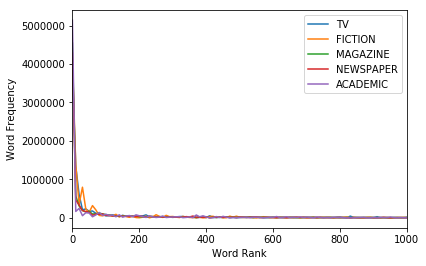

In [16]:
genres = ['TV', 'FICTION', 'MAGAZINE', 'NEWSPAPER', 'ACADEMIC']
for i in genres:
    plt.plot(coca['rank'], coca[i], label=i)
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')
plt.xlim(0, 1000) #Follow-up answer
plt.legend()

Zipf's Law states that there's an *inverse* relationship between the rank of a word and its frequency in a text is- if a word has a small rank, then we are more likely to see more instances of it. In addition, the amount of times a word occurs in a text gets really small really fast, and then keeps decreasing extremely slowly as it is close to zero. This means that the frequency *exponentially* decreases with increasing rank!

**Interact: ** Do you think the genre of the text matters in this case? Or do all texts exhibit a similar relationship? How can you tell from the graph?

**Follow-Up:** Let's take a closer look at the shape of the curve. Modify your code above so that the graph only shows words up to rank 1000.

## Parts of Speech

Now, we're going to look at if Zipf's Law holds for individual parts of speech. Parts of this exercise can be done through inspection, but the purpose is to help you practice your skills with cleaning data.

First, use a Pandas function to find how many times each part of speech is represented in our corpus, and call it `parts_of_speech`.
The column PoS tells us what part of speech a particular word is.

In [48]:
parts_of_speech = coca.groupby('PoS')[['TOT FREQ']].agg('count')

**Interact: **What do you notice about the data? Are there more occurences of one part of speech? Which do you think it is? (Noun? Verb? Adjective?)

Find the parts of speech that have at least 300 occurrences, and assign it to the variable `top_pos`.

In [28]:
#This code modifies the dataframe so you can use filter it based on values in the 'PoS' column
parts_of_speech = parts_of_speech.reset_index()
parts_of_speech

,PoS,TOT FREQ
0,a,1
1,c,5
2,d,6
3,i,5
4,j,2367
5,m,48
6,n,2652
7,p,14
8,r,300
9,u,12


In [37]:
top_pos = parts_of_speech[parts_of_speech['TOT FREQ'] >= 300]
top_pos

,TOT FREQ
PoS,
j,2367
n,2652
r,300
v,593


The list `part_lst` gives us a list of the parts of speech represented in the dataframe `top_pos`

In [38]:
part_lst = list(top_pos.index)
part_lst

['j', 'n', 'r', 'v']

Write a function that plots the distribution of words for each part of speech using what you learned about filtering and plotting. Run this on each item in `part_lst`. The function should take in one part of speech, filter the original `coca` dataframe by that part of speech, and then plot rank vs. frequency like the previous exercises.

In [52]:
def plot_part(pos):
    words_for_part = coca[coca['PoS'] == pos]
    plt.plot(words_for_part['rank'], words_for_part['TOT FREQ'], label=pos)
    plt.xlabel('Word Rank')
    plt.ylabel('Word Frequency')
    plt.xlim(0, 2000) 
    plt.legend()

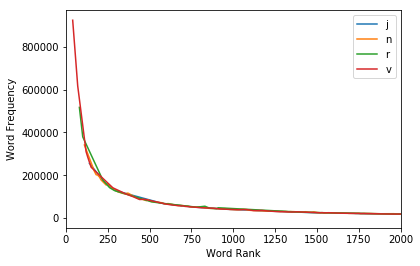

In [53]:
for i in part_lst:
    plot_part(i)

**Interact: ** Do you think the part of speech matters in this case? Does Zipf's Law hold across all major parts of speech? How can you tell from the graph?

## Transforming The Curve

Let's begin our final exercise by plotting the total frequency as a function of rank. We've done a lot of plots like this before, but now, we're going to observe something special by changing how the relationship is represented mathematically.

(0, 1000)

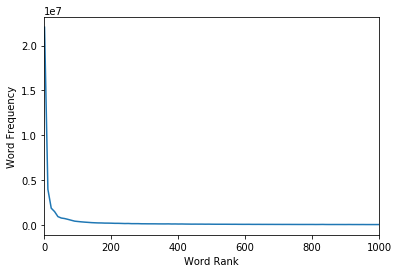

In [61]:
plt.plot(coca['rank'], coca['TOT FREQ'])
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')
plt.xlim(0, 1000) 


**Interact: ** What kind of _mathematical_ function do you think this curve represents? Think of it in terms of the relationship between rank and frequency. If $f(rank) = frequency$, then what kind of function would $f$ be?

Once you discuss your idea with other students and confirm with an instructor, think about the _opposite_ operation, and apply it on both rank and frequency. First, make arrays out of the rank and frequency columns, and then use the appropriate Numpy function on both of them.

In [62]:
rank = coca['rank']
frq = coca['TOT FREQ']
log_rank = np.log(rank)
log_frq = np.log(frq)

Plot the modified rank and frequency arrays and see what changes.

(0, 20)

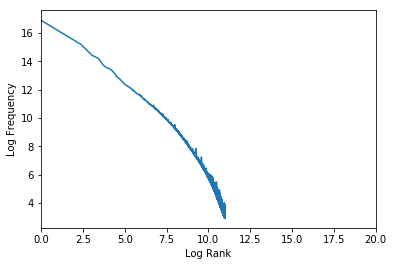

In [66]:
plt.plot(log_rank, log_frq)
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.xlim(0, 20) 


Discuss the significance of this relationship with your instructor and classmates! This transformation is extremely useful in data science, especially when working with high volumes of data.